In [1]:
# Lab2-3 solved items lacking yesterday
# further Labs 4-5 follow below, I prefer to keep all in a single doc

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# import sys
# import statistics

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
file1 = pd.read_excel('marketing_customer_analysis.xlsx')

In [3]:
file1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
file1.shape

(9134, 24)

In [5]:
cols = []

for i in range(len(file1.columns)):
    cols.append(file1.columns[i].upper())
file1.columns = cols
print(file1.columns)

Index(['CUSTOMER', 'STATE', 'CUSTOMER LIFETIME VALUE', 'RESPONSE', 'COVERAGE',
       'EDUCATION', 'EFFECTIVE TO DATE', 'EMPLOYMENTSTATUS', 'GENDER',
       'INCOME', 'LOCATION CODE', 'MARITAL STATUS', 'MONTHLY PREMIUM AUTO',
       'MONTHS SINCE LAST CLAIM', 'MONTHS SINCE POLICY INCEPTION',
       'NUMBER OF OPEN COMPLAINTS', 'NUMBER OF POLICIES', 'POLICY TYPE',
       'POLICY', 'RENEW OFFER TYPE', 'SALES CHANNEL', 'TOTAL CLAIM AMOUNT',
       'VEHICLE CLASS', 'VEHICLE SIZE'],
      dtype='object')


In [6]:
file1.head()

,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,INCOME,LOCATION CODE,MARITAL STATUS,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
file1.dtypes

CUSTOMER                          object
STATE                             object
CUSTOMER LIFETIME VALUE          float64
RESPONSE                          object
COVERAGE                          object
EDUCATION                         object
EFFECTIVE TO DATE                 object
EMPLOYMENTSTATUS                  object
GENDER                            object
INCOME                             int64
LOCATION CODE                     object
MARITAL STATUS                    object
MONTHLY PREMIUM AUTO               int64
MONTHS SINCE LAST CLAIM            int64
MONTHS SINCE POLICY INCEPTION      int64
NUMBER OF OPEN COMPLAINTS          int64
NUMBER OF POLICIES                 int64
POLICY TYPE                       object
POLICY                            object
RENEW OFFER TYPE                  object
SALES CHANNEL                     object
TOTAL CLAIM AMOUNT               float64
VEHICLE CLASS                     object
VEHICLE SIZE                      object
dtype: object

In [8]:
file1.isna().sum()

CUSTOMER                         0
STATE                            0
CUSTOMER LIFETIME VALUE          0
RESPONSE                         0
COVERAGE                         0
EDUCATION                        0
EFFECTIVE TO DATE                0
EMPLOYMENTSTATUS                 0
GENDER                           0
INCOME                           0
LOCATION CODE                    0
MARITAL STATUS                   0
MONTHLY PREMIUM AUTO             0
MONTHS SINCE LAST CLAIM          0
MONTHS SINCE POLICY INCEPTION    0
NUMBER OF OPEN COMPLAINTS        0
NUMBER OF POLICIES               0
POLICY TYPE                      0
POLICY                           0
RENEW OFFER TYPE                 0
SALES CHANNEL                    0
TOTAL CLAIM AMOUNT               0
VEHICLE CLASS                    0
VEHICLE SIZE                     0
dtype: int64

In [9]:
file1['EFFECTIVE TO DATE'] = pd.to_datetime(file1['EFFECTIVE TO DATE'])

In [12]:
file1.dtypes

CUSTOMER                                 object
STATE                                    object
CUSTOMER LIFETIME VALUE                 float64
RESPONSE                                 object
COVERAGE                                 object
EDUCATION                                object
EFFECTIVE TO DATE                datetime64[ns]
EMPLOYMENTSTATUS                         object
GENDER                                   object
INCOME                                    int64
LOCATION CODE                            object
MARITAL STATUS                           object
MONTHLY PREMIUM AUTO                      int64
MONTHS SINCE LAST CLAIM                   int64
MONTHS SINCE POLICY INCEPTION             int64
NUMBER OF OPEN COMPLAINTS                 int64
NUMBER OF POLICIES                        int64
POLICY TYPE                              object
POLICY                                   object
RENEW OFFER TYPE                         object
SALES CHANNEL                           

In [16]:
file1['EFFECTIVE TO MONTH'] = pd.DatetimeIndex(file1['EFFECTIVE TO DATE']).month
file1.shape

(9134, 25)

In [28]:
file1.head()

,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,INCOME,LOCATION CODE,MARITAL STATUS,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE,EFFECTIVE TO MONTH
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [36]:
filtered = file1[(file1['EFFECTIVE TO MONTH'] < 4)]
file1.head()

,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,INCOME,LOCATION CODE,MARITAL STATUS,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE,EFFECTIVE TO MONTH
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [37]:
#Lab3
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CUSTOMER                       9134 non-null   object        
 1   STATE                          9134 non-null   object        
 2   CUSTOMER LIFETIME VALUE        9134 non-null   float64       
 3   RESPONSE                       9134 non-null   object        
 4   COVERAGE                       9134 non-null   object        
 5   EDUCATION                      9134 non-null   object        
 6   EFFECTIVE TO DATE              9134 non-null   datetime64[ns]
 7   EMPLOYMENTSTATUS               9134 non-null   object        
 8   GENDER                         9134 non-null   object        
 9   INCOME                         9134 non-null   int64         
 10  LOCATION CODE                  9134 non-null   object        
 11  MARITAL STATUS   

In [38]:
file1.describe()

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT,EFFECTIVE TO MONTH
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [44]:
file1['RESPONSE'].count()

9134

In [40]:
file1['RESPONSE'].value_counts()

No     7826
Yes    1308
Name: RESPONSE, dtype: int64

In [54]:
response_rate = (1308/file1['RESPONSE'].count())*100
print(response_rate)

14.320122618786948


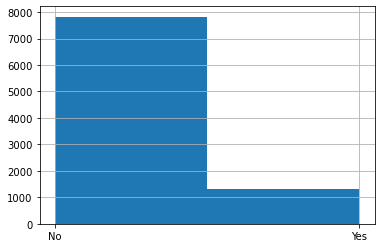

In [42]:
file1['RESPONSE'].hist(bins = 2)
plt.show()

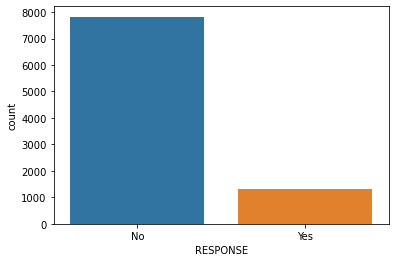

In [45]:
# nicer option
sns.countplot(x = 'RESPONSE', data=file1)
plt.show()

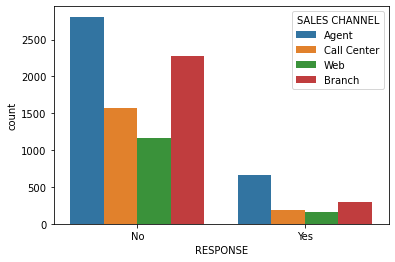

In [58]:
sns.countplot(x='RESPONSE', hue='SALES CHANNEL', data=file1)
plt.show()

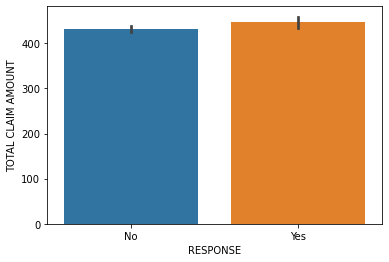

In [62]:
sns.barplot(x='RESPONSE', y='TOTAL CLAIM AMOUNT', data=file1)
plt.show()

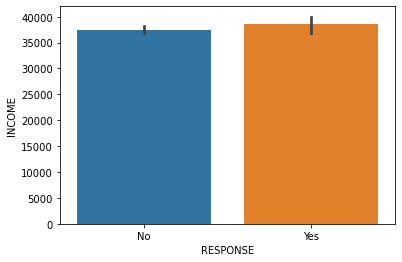

In [63]:
sns.barplot(x='RESPONSE', y='INCOME', data=file1)
plt.show()

In [65]:
#Lab4

numericals = file1.select_dtypes(include=[np.number])
categoricals = file1.select_dtypes(include=[np.object])

numericals.head()

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT,EFFECTIVE TO MONTH
0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,6979.535903,0,94,13,42,0,8,1131.464935,1
2,12887.431650,48767,108,18,38,0,2,566.472247,2
3,7645.861827,0,106,18,65,0,7,529.881344,1
4,2813.692575,43836,73,12,44,0,1,138.130879,2


In [66]:
numericals.columns

Index(['CUSTOMER LIFETIME VALUE', 'INCOME', 'MONTHLY PREMIUM AUTO',
       'MONTHS SINCE LAST CLAIM', 'MONTHS SINCE POLICY INCEPTION',
       'NUMBER OF OPEN COMPLAINTS', 'NUMBER OF POLICIES', 'TOTAL CLAIM AMOUNT',
       'EFFECTIVE TO MONTH'],
      dtype='object')

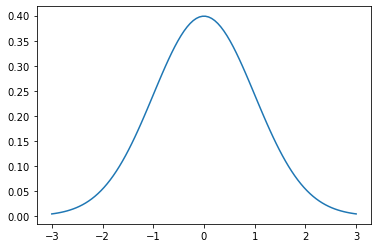

In [77]:
from scipy.stats import norm
import math
normal = norm(0, math.sqrt(9)) 
fig, ax = plt.subplots(1, 1) 
x = np.linspace(-3,3,100)
y = norm.pdf(x) 
ax.plot(x,y)
plt.show()

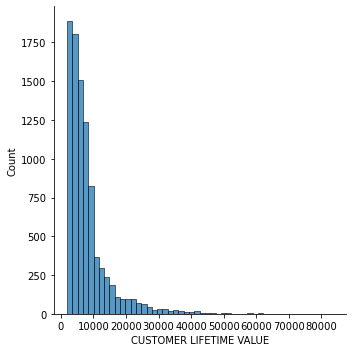

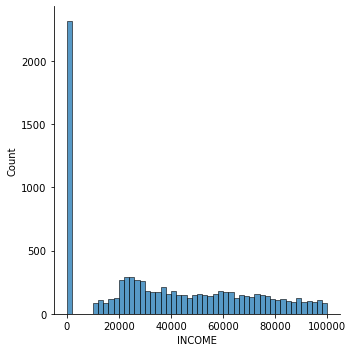

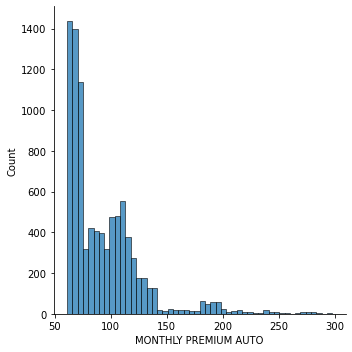

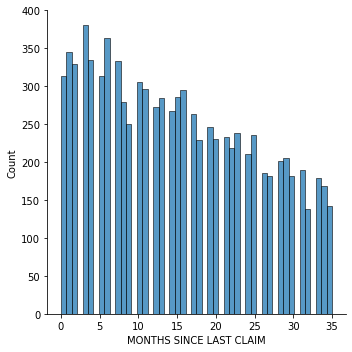

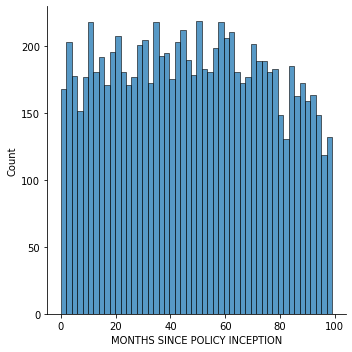

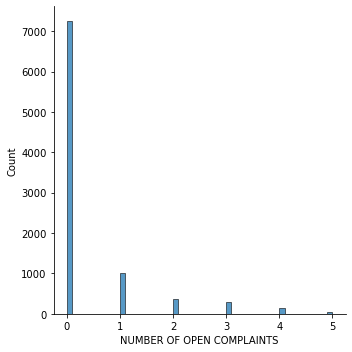

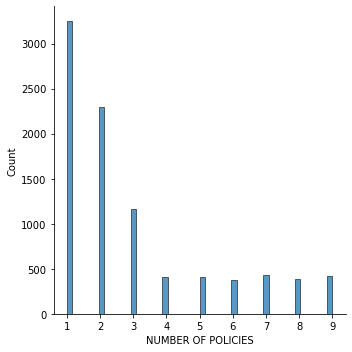

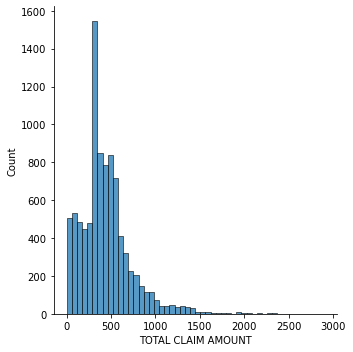

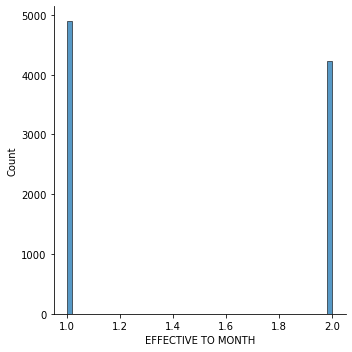

In [80]:
for i in numericals:
    sns.displot(numericals[i], bins=50)
plt.show()

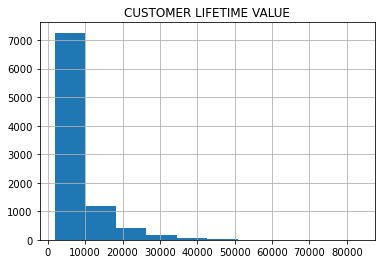

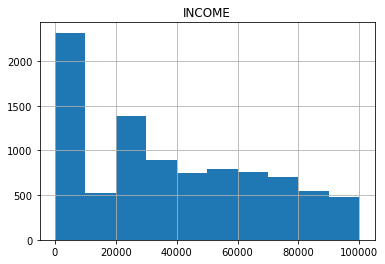

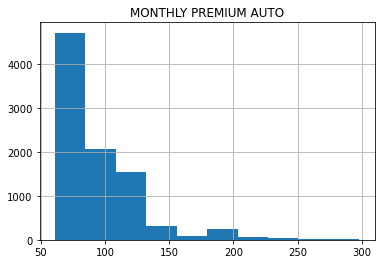

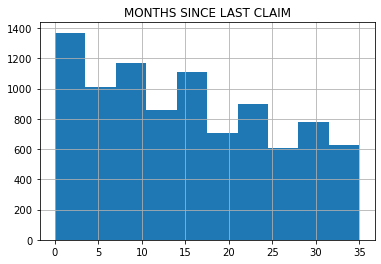

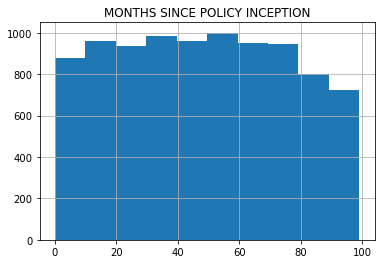

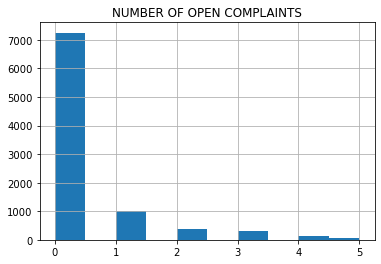

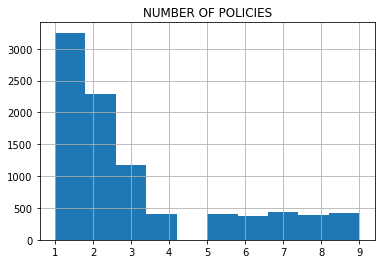

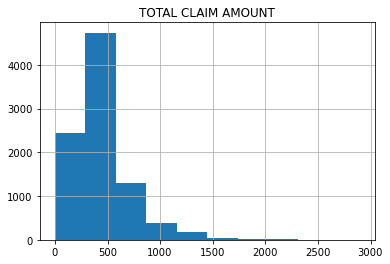

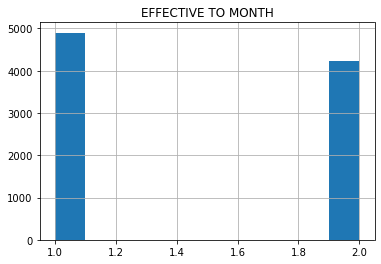

In [88]:
for i in numericals.columns:
    numericals.hist(i)
plt.show()

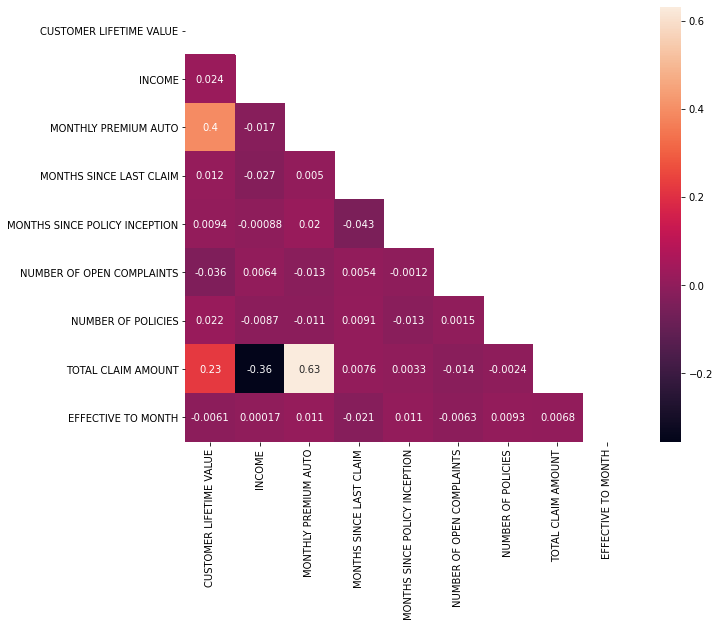

In [91]:
correlations_matrix = numericals.corr()
mask = np.zeros_like(correlations_matrix) 
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [99]:
#Lab5

Y = file1['TOTAL CLAIM AMOUNT']
X = file1.drop(['TOTAL CLAIM AMOUNT'], axis=1)
file1.head()

,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,INCOME,LOCATION CODE,MARITAL STATUS,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE,EFFECTIVE TO MONTH
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [100]:
X_num = file1.select_dtypes(include = np.number)
X_cat = file1.select_dtypes(include = np.object)
X_num.head()

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT,EFFECTIVE TO MONTH
0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,6979.535903,0,94,13,42,0,8,1131.464935,1
2,12887.431650,48767,108,18,38,0,2,566.472247,2
3,7645.861827,0,106,18,65,0,7,529.881344,1
4,2813.692575,43836,73,12,44,0,1,138.130879,2


In [101]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_num)   #fit(x_num) gives the mean and stdev for the column so the columns can be transformed to a standard normal distribution
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)

(9134, 9)


In [102]:
x_normalized = pd.DataFrame(x_normalized)

In [103]:
x_normalized.head()

,0,1,2,3,4,5,6,7,8
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830,0.000035
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005,0.000141
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230,0.000040
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128,0.000130
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145,0.000046
